# Particle Swarm usage tutorial

In [1]:
from pso.pso import particle_swarm
import numpy as np
import matplotlib.pyplot as plt

## Function description
Args:
- func: Input function (should accept numpy arrays for the variables)
-param_dict: dictionary with the function parameters and lower and upper limits for the values
- maximize (bool): Maximize or minimize the results
- swarm_properties: particle swarm properties (inertia weight, indicivual cognition, social learning)
- n_particles: Number of particles
- n_iter: Number of iterations
- export (bool): Wheter to export data
- plot (bool): Wheter to plot best_iter

Return:

- gfitness: Best value obtained
- gbest: Best parameters
- pbest: Best parameters for each particle
- gbest_array: Best value obtained for each iteration

## Methodology

First define a function that returns a Figure of merit value.

In [2]:
def gaussian_test(x, y):
    """Test function to minimize"""
    return -np.exp(-x**2)*np.exp(-y**2)

def trig_test(x, y):
    """Test function to maximize"""
    return np.sin(x)*np.cos(y)*np.sin(y)*np.cos(0.9*x)

def vectorize_test(x, y):
    """Test function for np.vectorize"""
    return (x - 3) * (y - 2)

## Plot the functions

In [3]:
x = np.linspace(0, 3, 200)
y = np.linspace(0, 3, 200)

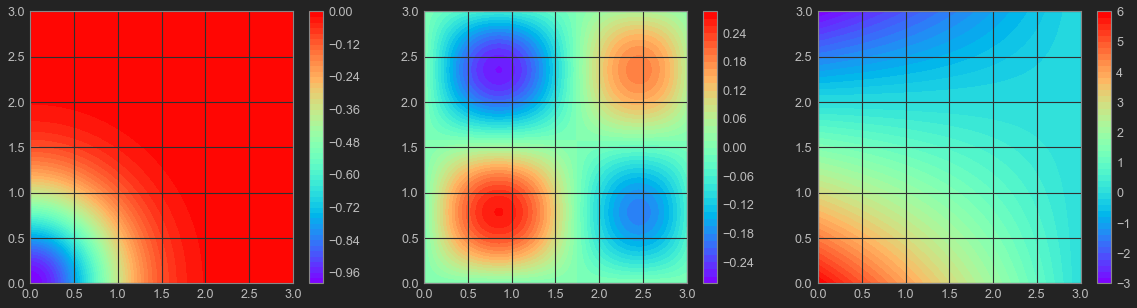

In [4]:
XX, YY = np.meshgrid(x, y)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax0 = ax[0].contourf(XX, YY, gaussian_test(XX, YY), cmap='rainbow', levels=50)
ax1 = ax[1].contourf(XX, YY, trig_test(XX, YY), cmap='rainbow', levels=50)
ax2 = ax[2].contourf(XX, YY, vectorize_test(XX, YY), cmap='rainbow', levels=50)
fig.colorbar(ax0, ax = ax[0])
fig.colorbar(ax1, ax = ax[1])
fig.colorbar(ax2, ax = ax[2])

## Testing function minimization (gauss_test function)

-1.0 [0. 0.]


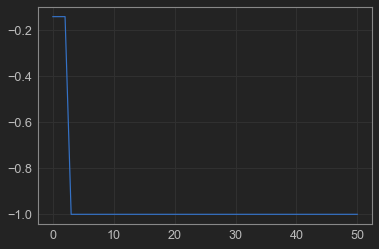

In [5]:
param_dict = {"x":[0,10], "y":[0, 10]}
best, best_loc, best_particle, best_iter = particle_swarm(gaussian_test, param_dict, maximize=False, plot=False)
print(best, best_loc)
plt.plot(best_iter)

## Testing Maximize (trig_test.)

Best Value
0.2709887156130494
Best pos
[0.85480508 0.78610667]


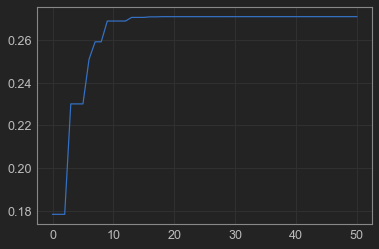

In [6]:
param_dict = {"x":[0,3], "y":[0,3]}
best, best_loc, best_particle, best_iter = particle_swarm(trig_test, param_dict, plot=False)
print("Best Value", best, "Best pos", best_loc, sep="\n")
plt.plot(best_iter)

## Testing vectorize (vectorize_test)

Best Value
-3.0
Best pos
[0. 3.]


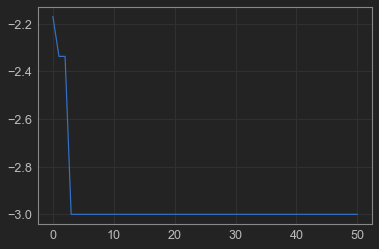

In [7]:
param_dict = {"x":[0,3], "y":[0, 3]}
vect_func = np.vectorize(vectorize_test)
best, best_loc, best_particle, best_iter = particle_swarm(vect_func, param_dict, maximize=False, plot=False)
print("Best Value", best, "Best pos", best_loc, sep="\n")
plt.plot(best_iter)